<a href="https://colab.research.google.com/github/BrenoMafra13/COMP3132-Machine_Learning/blob/main/labs/Lab_Week03/LabWeek3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Week 3: The mathematical building blocks of neural networks

This lab is based on the materials of the second chapter the course text book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff) (See D2l -> Course Information -> Text Book.)

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the MNIST dataset in Keras

In [2]:
from tensorflow.keras.datasets import mnist
(train_images_orig, train_labels), (test_images_orig, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_images_orig.shape # the shape is (b, w, h)

(60000, 28, 28)

In [4]:
train_images_orig.ndim

3

## The shape of image data

**Note:** For black-and-white images, the number of channels equals 1, so it is not explicitly mentioned in the data.

- color images shape: (samples_n, channel_n, hight, width)
- gray images shape: (sample_n, hight, width)


![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/image_data.png)

## Exploring the dataset

sample image shape:  (28, 28)
sample image data type:  <class 'numpy.ndarray'>
printing the numerical value of a sample image
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  85 255 212
   34   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  62 237 253 253
   84   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  78 253 253 253
   84   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  

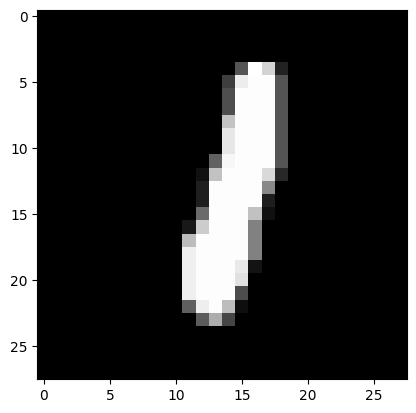

In [5]:
# Note: run this cell multiple times
index = np.random.randint(0, 60000)
sample_image = train_images_orig[index]

print("sample image shape: ", sample_image.shape)
print("sample image data type: ", type(sample_image))

print("=" * 100)
print("printing the numerical value of a sample image")
print(sample_image)

# aligning the pixel values in the output
print("=" * 100)
for row in sample_image:
  print("".join([str(elem).ljust(3) for elem in row]))

print("=" * 100)
plt.imshow(sample_image, cmap="gray")
plt.show()


**Sanity check 1:** Find the shape of the train and test data and lebels



In [7]:
print(train_images_orig.shape)
print(train_labels.shape)
print(test_images_orig.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


**Sanity Check 2:** Print the labels. How many unique label value do you see?

In [9]:
print(train_labels)
print("Unique labels:", np.unique(train_labels))
print("Number of unique labels:", len(np.unique(train_labels)))

[5 0 4 ... 5 6 8]
Unique labels: [0 1 2 3 4 5 6 7 8 9]
Number of unique labels: 10


### **Exercise 1:** Display the fourth image in the `test set` with its label.

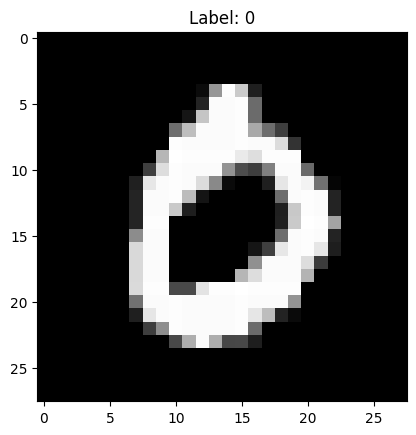

In [10]:
index_ex1 = 3 # Fourth element is at index 3
plt.imshow(test_images_orig[index_ex1], cmap="gray")
plt.title(f"Label: {test_labels[index_ex1]}")
plt.show()

# A first look at a neural network

## **Step 1:** The network architecture

In [11]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Input(shape=(784,)), #or shape=(28*28,)
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**Note: The nodes in the `Input layer` are not neurons. They are pixel values.**

<img src="https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/architecture.png" width="1000" height="400">

### **Input layer** - Preparing the image data

In [12]:
train_images = train_images_orig.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images= test_images_orig.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

### **Exercise 2:** What is the shape of data after preprocessing

In [13]:
print("Shape of train_images after preprocessing:", train_images.shape)
print("Shape of test_images after preprocessing:", test_images.shape)

Shape of train_images after preprocessing: (60000, 784)
Shape of test_images after preprocessing: (10000, 784)


### Tensor reshaping

In [14]:
a = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
a.shape

(3, 2)

### **Exercise 3:** reshape the `a` matrix to 6 x 1 matrix.

In [15]:
a_reshaped = a.reshape((6, 1))
print(a_reshaped.shape)
print(a_reshaped)

(6, 1)
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]


### **Hidden layer** with `relu` activation function

Each neuron in the hidden layer, as illustrated in the figure below, comprises two main components: the summation function and the activation function.

In our architecture, we have 512 neurons in the hidden layer.

<img src=https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/relu.webp with="500" height="300">

**The preferred activation function for hidden layers is `relu`. The mathematical function of ReLU is as follows:**

$$
relu(x) = max(0, x)
$$

> **Note: ReLU is considered as one of the biggest breakthroughs in deep learning because ReLU makes it possible to train a very deep neural network. It has solved the `vanishing gradient` challenge in `deep` networks with many hidden layers.**


### **Exercise 4** Write a function that takes a number/array `x` and returns `relu(x)`. Use the `np.maximum()` method in your function. Then, plot this function for x in the range of -5 to 5.

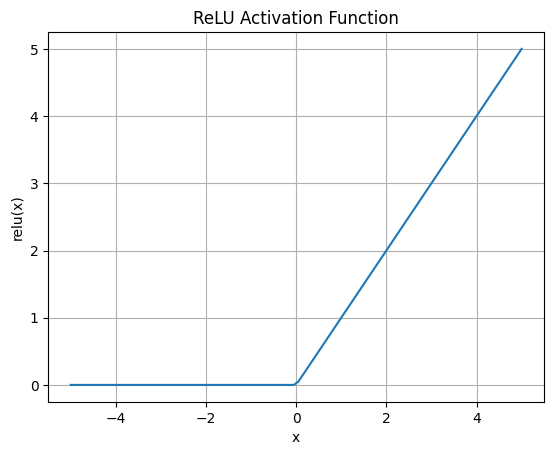

In [17]:
x_values = np.linspace(-5, 5, 100)
y_values = relu(x_values)

plt.plot(x_values, y_values)
plt.title("ReLU Activation Function")
plt.xlabel("x")
plt.ylabel("relu(x)")
plt.grid(True)
plt.show()

In [18]:
def relu(x):
  return np.maximum(0, x)

### **Exercise 5:** Suppose that I have 5 neurons in my hidden layer. After the summation stage, the result of this layer is `[-10, 5, 0, -2, 6]`. What is the result after passing this through the ReLU activation function?

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-relu.png)

your answer here:

### **Output layer** - `Sigmoid` and `Softmax` activation function

<img src=https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/overal_logit-softmax.png height="650" width="650" >

Each neuron in the last layer of the neural network should output a number between 0 and 1 because each neuron represents the probability of the input belonging to a specific class.

**Important Note:** The values of the neurons in the last layer before applying the activation function are called `logits` or `scores`.

One way to achieve this is by using the sigmoid activation function.

The sigmoid function takes an input
`x` and outputs a number between 0 and 1.

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

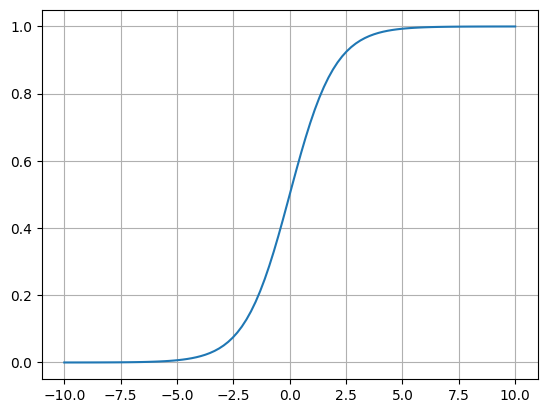

In [19]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)
plt.grid()
plt.show()

### **Exercise 6:** Using the sigmoid function defined in the previous cell, suppose the last layer of a neural network has 4 neurons with the following values: [3.2, 1.3, 0.2, 0.8].
  - Show bar plot of last layer values before applying any activation function (logits)
  - Apply the sigmoid function to these values to map them to numbers between 0 and 1.
  - Then, generate a bar plot of the scaled values.

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-sigmoid.png)

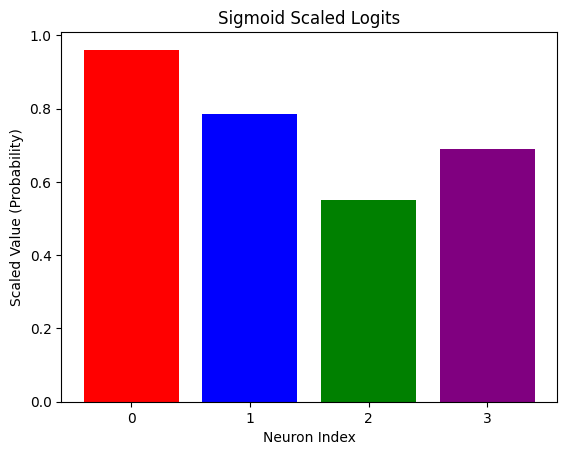

In [22]:
# we call value of the last layer before applying activation func as logits
logits = np.array([3.2, 1.3, 0.2, 0.8])
logits_scaled = sigmoid(logits) #put your calculation instead of ...

plt.bar(np.arange(len(logits_scaled)), logits_scaled, color=['red', 'blue', 'green', 'purple'])
plt.title("Sigmoid Scaled Logits")
plt.xlabel("Neuron Index")
plt.ylabel("Scaled Value (Probability)")
plt.xticks(np.arange(4))
plt.show()

This plot shows the probability distribution over labels. However, there is an issue here: with the sigmoid function, each output is independent and bounded between 0 and 1, but their sum is not constrained to equal 1. To address this, we use the softmax function, which normalizes the outputs so that they sum to 1, ensuring a valid probability distribution over the labels.


$$
\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^N e^{x_j}}
$$

In [23]:
def softmax(x):
  """
  input x is a vector representing the output of the last layer of a neural network
  """
  return np.exp(x)/sum(np.exp(x))

### **Exercise 7:** Pass the logits defined in Exercise 6 from the softmax function and plot the probability distribution over the labels.

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-softmax.png)

In [27]:
#your code here
logits = np.array([3.2, 1.3, 0.2, 0.8])
probs = softmax(logits) # start your code form this line
probs

array([0.77514955, 0.11593805, 0.03859242, 0.07031998])

In [28]:
sum(probs)

np.float64(1.0000000000000002)

<BarContainer object of 4 artists>

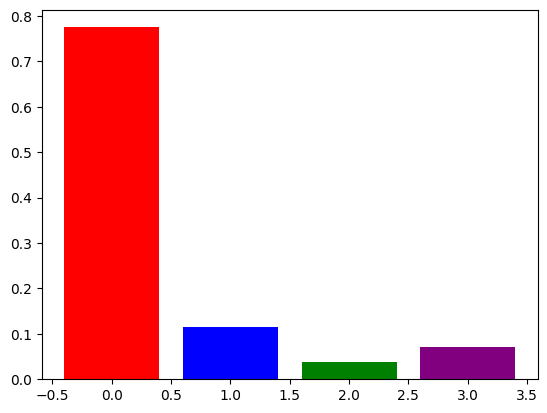

In [29]:
plt.bar(np.arange(len(probs)), probs, color=['red', 'blue', 'green', 'purple'])

### **Exercise 8:** Given the `probs` you calculated in the previous Exercise, find the predicted label using `np.argmax()` method.

In [33]:
predicted_label = np.argmax(probs)
print("Predicted label:", predicted_label)

Predicted label: 0


> **To summarize so far, the input to the neural network is, for example, an image, and the output is the probability distribution over the labels. By taking argmax from the probabilty distribtion you can get the predicted label**







## **Step 2:** The compilation step

In [34]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [35]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In the next steps, we will train the neural network defined in step 1. By training the network, we optimize the weights between the neurons.

Revisit the model:

```python
model = keras.Sequential([
    layers.Input(shape=(784,)), #or shape=(28*28,)
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
```




## **Step 3:** "Fitting" the model

In [36]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8757 - loss: 0.4359
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9653 - loss: 0.1155
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9787 - loss: 0.0743
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9848 - loss: 0.0523
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9891 - loss: 0.0389


## **Step 4:** Using the model to make predictions

In [37]:
test_digits = test_images[:3] #predictiong the label of test_image[0] , test_image[1], test_image[2]
print("input shape:", test_digits.shape)

predictions = model.predict(test_digits)
print("output shape: ", predictions.shape)
predictions


input shape: (3, 784)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
output shape:  (3, 10)


array([[2.0983850e-07, 1.1487059e-08, 2.9759815e-06, 2.4208603e-05,
        8.9664465e-12, 3.5257738e-08, 6.8870972e-12, 9.9997211e-01,
        1.1079922e-07, 3.7704962e-07],
       [4.2845946e-07, 1.6125610e-05, 9.9977785e-01, 1.9718142e-04,
        4.5398318e-13, 9.4729739e-07, 6.3542041e-07, 1.9180775e-13,
        6.7740953e-06, 9.5206985e-12],
       [1.2475355e-06, 9.9885499e-01, 1.8512207e-04, 5.8182868e-06,
        1.6786193e-04, 1.8362933e-05, 4.3101383e-05, 2.4132269e-04,
        4.7856936e-04, 3.5426497e-06]], dtype=float32)

### **Exercise 9:** Interpret the values in the `prediction`array.  

**your answer here:**
Each row in the predictions array represents the probability distribution (confidence scores) of the neural network for each of the 10 digits for a given input image.

### See the result for the prediction of the first image

In [38]:
print(predictions[0])
predicted_label = np.argmax(predictions[0])
print("Predicted label: ", predicted_label)

[2.0983850e-07 1.1487059e-08 2.9759815e-06 2.4208603e-05 8.9664465e-12
 3.5257738e-08 6.8870972e-12 9.9997211e-01 1.1079922e-07 3.7704962e-07]
Predicted label:  7


In [39]:
print("highest prob: ", predictions[0][7])

highest prob:  0.9999721


In [40]:
true_label = test_labels[0]
print("True label: ", true_label)

True label:  7


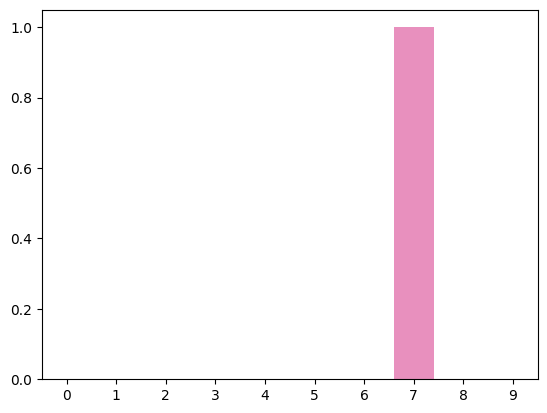

In [41]:
# plt.bar(np.arange(10), predictions[0])
sns.barplot(x=np.arange(10), y=predictions[0], hue=np.arange(10), palette='Set1', legend=False)
plt.xticks(np.arange(10))
plt.show()

> **So, the output distribution of the model is very close to our ideal distribution, which is [0, 0, 0, 0, 0, 0, 0, 1, 0, 0].**



### **Exercise 10:** Predict the label of the fourth element of the test set.

**Important Note: Neural networks are designed to predict labels for a batch of data. For example, in the previous section, we predicted labels for a batch of four images, where the input shape was (4, 784). Similarly, when working with a single image, it must be fed into the network in the batch format with a shape of (1, 784).**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted label for the fourth test image: 0
True label for the fourth test image: 0


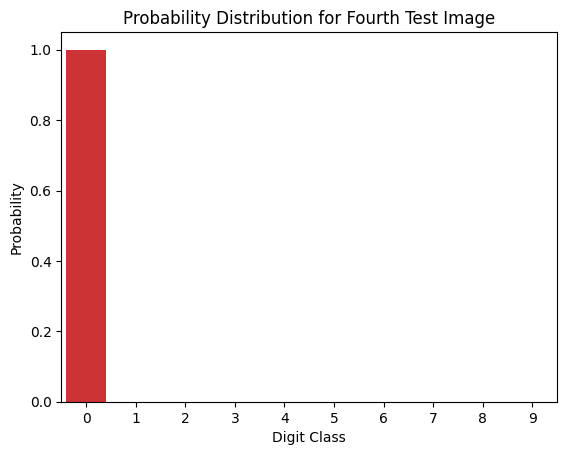

In [43]:
single_test_image = test_images[3]
single_test_image_batch = single_test_image.reshape(1, 28 * 28)
prediction_for_fourth_image = model.predict(single_test_image_batch)
predicted_label_ex10 = np.argmax(prediction_for_fourth_image[0])
true_label_ex10 = test_labels[3]

print(f"Predicted label for the fourth test image: {predicted_label_ex10}")
print(f"True label for the fourth test image: {true_label_ex10}")

# Plot the probability distribution
sns.barplot(x=np.arange(10), y=prediction_for_fourth_image[0], hue=np.arange(10), palette='Set1', legend=False)
plt.xticks(np.arange(10))
plt.title("Probability Distribution for Fourth Test Image")
plt.xlabel("Digit Class")
plt.ylabel("Probability")
plt.show()

## **Step 5:** Evaluating the model on new data

In [44]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9764 - loss: 0.0785
test_acc: 0.9794999957084656


**Note:** We will discuss `optimizer`, `loss`, `epoch`, and `batch` in more depth in the coming weeks.